In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # numerical integration solver

In [4]:
#@title Figure settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

#@title Plotting Functions
def plot_trajectory(system, params, initial_condition, dt=0.1, T=6,
                    figtitle=None):

    """
    Shows the solution of a linear system with two variables in 3 plots.
    The first plot shows x1 over time. The second plot shows x2 over time.
    The third plot shows x1 and x2 in a phase portrait.

    Args:
      system (function): a function f(x) that computes a derivative from
                         inputs (t, [x1, x2], *params)
      params (list or tuple): list of parameters for function "system"
      initial_condition (list or array): initial condition x0
      dt (float): time step of simulation
      T (float): end time of simulation
      figtitlte (string): title for the figure

    Returns:
      nothing, but it shows a figure
    """

    # time points for which we want to evaluate solutions
    t = np.arange(0, T, dt)

    # Integrate
    # use built-in ode solver
    solution = solve_ivp(system,
                     t_span=(0, T),
                     y0=initial_condition, t_eval=t,
                     args=(params),
                     dense_output=True)
    x = solution.y

    # make a color map to visualize time
    timecolors = np.array([(1 , 0 , 0, i)  for i in t / t[-1]])

    # make a large figure
    fig, (ah1, ah2, ah3) = plt.subplots(1, 3)
    fig.set_size_inches(10, 3)

    # plot x1 as a function of time
    ah1.scatter(t, x[0,], color=timecolors)
    ah1.set_xlabel('time')
    ah1.set_ylabel('x1', labelpad=-5)

    # plot x2 as a function of time
    ah2.scatter(t, x[1], color=timecolors)
    ah2.set_xlabel('time')
    ah2.set_ylabel('x2', labelpad=-5)

    # plot x1 and x2 in a phase portrait
    ah3.scatter(x[0,], x[1,], color=timecolors)
    ah3.set_xlabel('x1')
    ah3.set_ylabel('x2', labelpad=-5)
    #include initial condition is a blue cross
    ah3.plot(x[0,0], x[1,0], 'bx')

    # adjust spacing between subplots
    plt.subplots_adjust(wspace=0.5)

    # add figure title
    if figtitle is not None:
      fig.suptitle(figtitle, size=16)


def plot_streamplot(A, ax, figtitle=None):
    """
    Show a stream plot for a linear ordinary differential equation with
    state vector x=[x1,x2] in axis ax.

    Args:
      A (numpy array): 2x2 matrix specifying the dynamical system
      figtitle (string): title for the figure

    Returns:
      nothing, but shows a figure
    """

    # sample 20 x 20 grid uniformly to get x1 and x2
    grid = np.arange(-20, 21, 1)
    x1, x2 = np.meshgrid(grid, grid)

    # calculate x1dot and x2dot at each grid point
    x1dot = A[0,0] * x1 + A[0,1] * x2
    x2dot = A[1,0] * x1 + A[1,1] * x2

    # make a colormap
    magnitude = np.sqrt(x1dot ** 2 + x2dot ** 2)
    color = 2 * np.log1p(magnitude) #Avoid taking log of zero

    # plot
    plt.sca(ax)
    plt.streamplot(x1, x2, x1dot, x2dot, color=color,
                   linewidth=1, cmap=plt.cm.cividis,
                   density=2, arrowstyle='->', arrowsize=1.5)
    plt.xlabel(r'$x1$')
    plt.ylabel(r'$x2$')

    # figure title
    if figtitle is not None:
        plt.title(figtitle, size=16)

    # include eigenvectors
    if True:
        # get eigenvalues and eigenvectors of A
        lam, v = np.linalg.eig(A)

        # get eigenvectors of A
        eigenvector1 = v[:,0].real
        eigenvector2 = v[:,1].real

        # plot eigenvectors
        plt.arrow(0, 0, 20*eigenvector1[0], 20*eigenvector1[1],
                  width=0.5, color='r', head_width=2,
                  length_includes_head=True)
        plt.arrow(0, 0, 20*eigenvector2[0], 20*eigenvector2[1],
                  width=0.5, color='b', head_width=2,
                  length_includes_head=True)

def plot_specific_example_stream_plots(A_options):
    """
    Show a stream plot for each A in A_options

    Args:
      A (list): a list of numpy arrays (each element is A)

    Returns:
      nothing, but shows a figure
    """
    # get stream plots for the four different systems
    plt.figure(figsize=(10,10))

    for i, A in enumerate(A_options):

        ax = plt.subplot(2, 2, 1+i)
        # get eigenvalues and eigenvectors
        lam, v = np.linalg.eig(A)

        # plot eigenvalues as title
        # (two spaces looks better than one)
        eigstr = ",  ".join([f"{x:.2f}" for x in lam])
        figtitle =f"A with eigenvalues\n"+ '[' + eigstr + ']'
        plot_streamplot(A, ax, figtitle=figtitle)

        # Remove y_labels on righthand plots
        if i%2:
          ax.set_ylabel(None)
        if i<2:
          ax.set_xlabel(None)

        plt.subplots_adjust(wspace=0.3, hspace=0.3)
        

Text(0, 0.5, 'x')

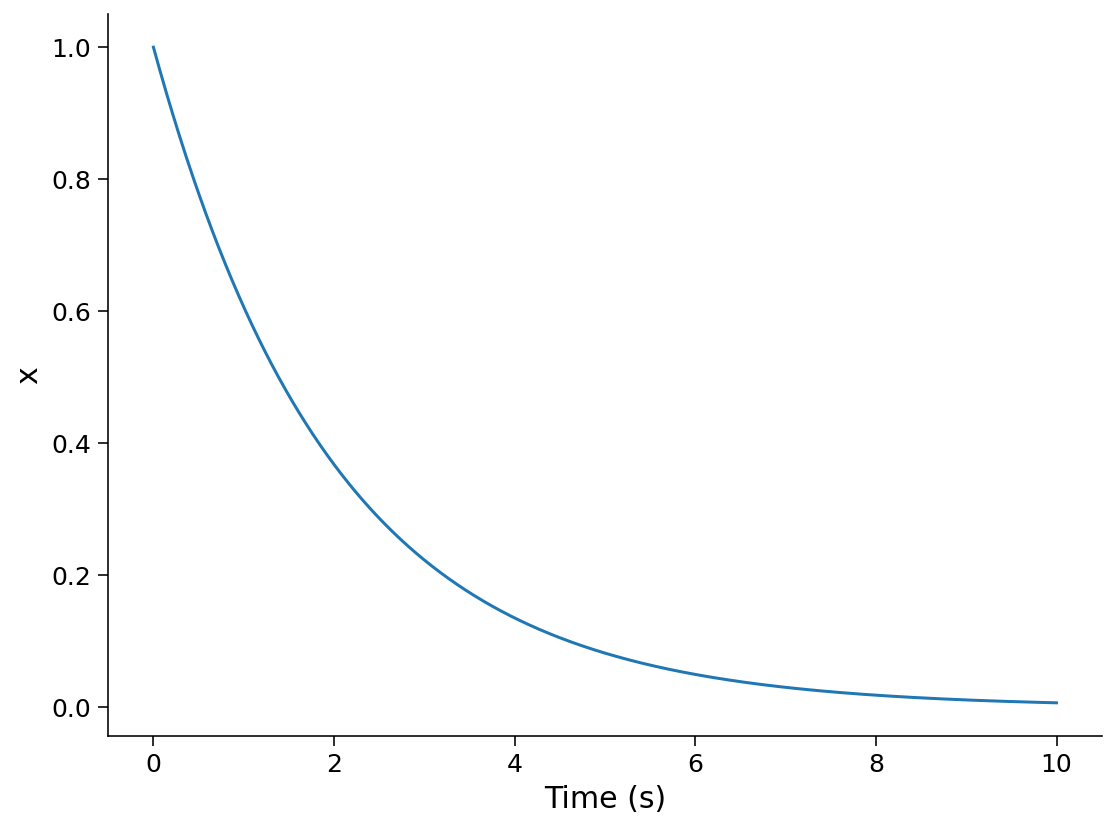

In [5]:
def integrate_exponential(a, x0, dt, T):
  """Compute solution of the differential equation xdot=a*x with
  initial condition x0 for a duration T. Use time step dt for numerical
  solution.

  Args:
    a (scalar): parameter of xdot (xdot=a*x)
    x0 (scalar): initial condition (x at time 0)
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # Initialize variables
  t = np.arange(0, T, dt)
  x = np.zeros_like(t, dtype=complex)
  x[0] = x0 # This is x at time t_0

  # Step through system and integrate in time
  for k in range(1, len(t)):

    # for each point in time, compute xdot from x[k-1]
    xdot = a*x[k-1]

    # Update x based on x[k-1] and xdot
    x[k] = x[k-1] + xdot*dt

  return x, t


# Choose parameters
a = -0.5    # parameter in f(x)
T = 10      # total Time duration
dt = 0.001  # timestep of our simulation
x0 = 1.     # initial condition of x at time 0

# Use Euler's method
x, t = integrate_exponential(a, x0, dt, T)

# Visualize
plt.plot(t, x.real)
plt.xlabel('Time (s)')
plt.ylabel('x')

In [6]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

T = 10      # total Time duration
x0 = 1.     # initial condition of x at time 0

@widgets.interact
def plot_euler_integration(a=(-2.5, 1.5, .25), dt = widgets.SelectionSlider(options=[("%g"%i,i) for i in np.arange(0.001, 1.001, 0.01)])):
  # Have to do this clunky word around to show small values in slider accurately
  # (from https://github.com/jupyter-widgets/ipywidgets/issues/259)

  x, t = integrate_exponential(a, x0, dt, T)
  plt.plot(t, x.real) # integrate_exponential returns complex
  plt.xlabel('Time (s)')
  plt.ylabel('x')

interactive(children=(FloatSlider(value=-0.5, description='a', max=1.5, min=-2.5, step=0.25), SelectionSlider(…

In [7]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

# parameters
T = 5         # total Time duration
dt = 0.0001      # timestep of our simulation
x0 = 1.        # initial condition of x at time 0

@widgets.interact
def plot_euler_integration(real=(-2, 2, .2), imaginary=(-4, 7, .1)):

  a = complex(real, imaginary)
  x, t = integrate_exponential(a, x0, dt, T)
  plt.plot(t, x.real) #integrate exponential returns complex
  plt.grid(True)
  plt.xlabel('Time (s)')
  plt.ylabel('x')

interactive(children=(FloatSlider(value=0.0, description='real', max=2.0, min=-2.0, step=0.2), FloatSlider(val…

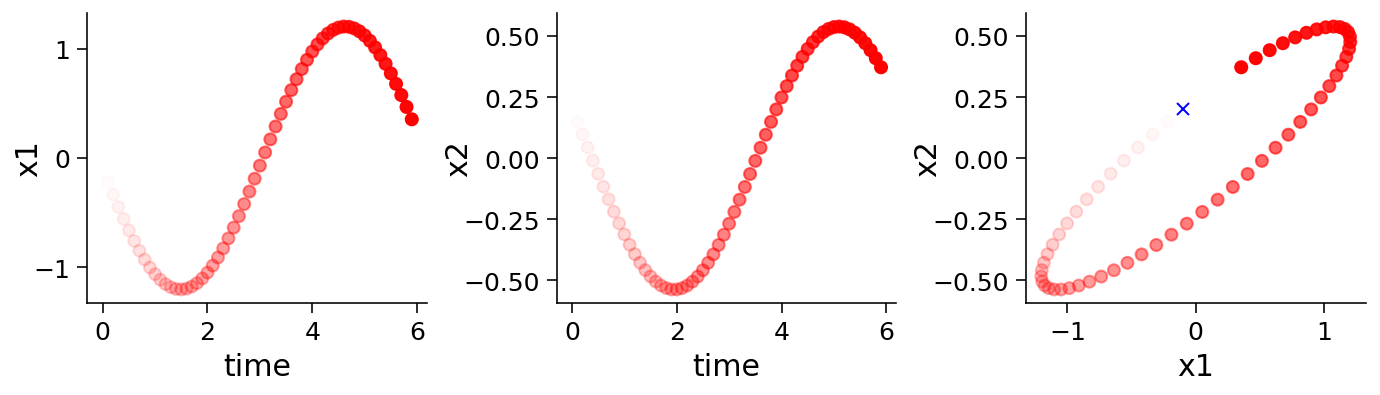

In [8]:
def system(t, x, a00, a01, a10, a11):
  '''
  Compute the derivative of the state x at time t for a linear
  differential equation with A matrix [[a00, a01], [a10, a11]].

  Args:
    t (float): time
    x (ndarray): state variable
    a00, a01, a10, a11 (float): parameters of the system

  Returns:
    ndarray: derivative xdot of state variable x at time t
  '''


  # compute x1dot and x2dot
  x1dot = a00*x[0] + a01*x[1]
  x2dot = a10*x[0] + a11*x[1]

  return np.array([x1dot, x2dot])


# Set parameters
T = 6 # total time duration
dt = 0.1 # timestep of our simulation
A = np.array([[2, -5],
              [1, -2]])
x0 = [-0.1, 0.2]

# Simulate and plot trajectories
plot_trajectory(system, [A[0,0],A[0,1],A[1,0],A[1,1]], x0, dt=dt, T=T)

In [9]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

# parameters
T = 6      # total Time duration
dt = 0.1   # timestep of our simulation
x0 = np.asarray([-0.1, 0.2])        # initial condition of x at time 0

A_option_1 = [[2, -5],[1, -2]]
A_option_2 = [[3,4], [1, 2]]
A_option_3 = [[-1, -1], [0, -0.25]]
A_option_4 = [[3, -2],[2, -2]]

@widgets.interact
def plot_euler_integration(A = widgets.Dropdown(
  options=[A_option_1, A_option_2, A_option_3, A_option_4, None],
  value=A_option_1
)):
  if A:
    plot_trajectory(system, [A[0][0],A[0][1],A[1][0],A[1][1]], x0, dt=dt, T=T)

interactive(children=(Dropdown(description='A', options=([[2, -5], [1, -2]], [[3, 4], [1, 2]], [[-1, -1], [0, …

In [11]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

# parameters
T = 6      # total Time duration
dt = 0.1   # timestep of our simulation
x0 = np.asarray([-0.1, 0.2])        # initial condition of x at time 0
A = [[2, -5],[1, -2]]

x0_option_1 = [-.1, 0.2]
x0_option_2 = [10, 10]
x0_option_3 = [-4, 3]

@widgets.interact
def plot_euler_integration(x0 = widgets.Dropdown(
  options=[x0_option_1, x0_option_2, x0_option_3, None],
  value=x0_option_1
)):
  if x0:
    plot_trajectory(system, [A[0][0],A[0][1],A[1][0],A[1][1]], x0, dt=dt, T=T)

interactive(children=(Dropdown(description='x0', options=([-0.1, 0.2], [10, 10], [-4, 3], None), value=[-0.1, …

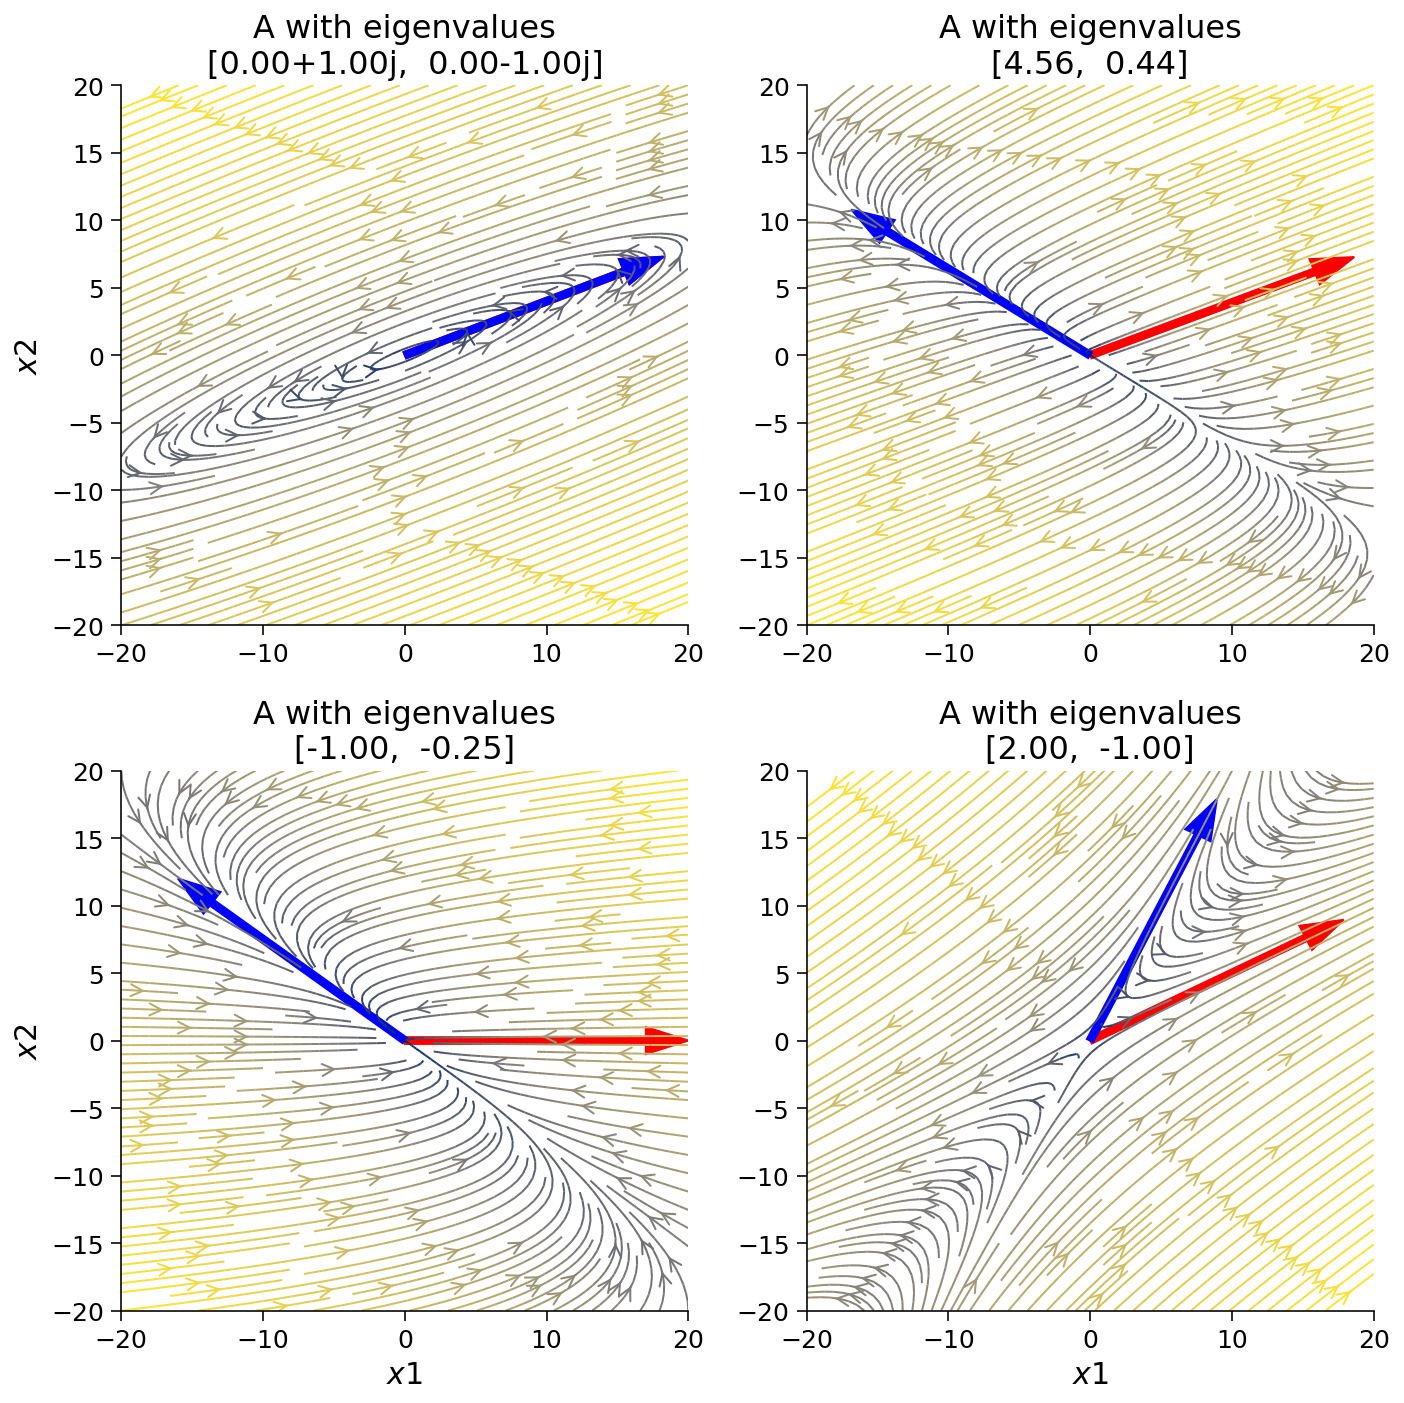

In [9]:
# @markdown Execute this cell to see stream plots

A_option_1 = np.array([[2, -5], [1, -2]])
A_option_2 = np.array([[3,4], [1, 2]])
A_option_3 = np.array([[-1, -1], [0, -0.25]])
A_option_4 = np.array([[3, -2], [2, -2]])

A_options = [A_option_1, A_option_2, A_option_3, A_option_4]
plot_specific_example_stream_plots(A_options)